# Escuela Politécnica Nacional
## Métodos Numericos
### Isaac González
#### 25/11/2025
##### Tarea 6

---

Determine el orden de la mejor aproximación para las siguietes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:


- 1. $\frac{1}{25x^2+1}, x_0=0 $

Serie de Taylor 

Polinomio de 4 Orden: $ \frac{125}{2}x^4 -25x^2 + 1  $

In [1]:
import sympy as sp

x = sp.Symbol('x')
f = 1/(1+25*x**2)

derivs = [f.diff(x, k) for k in range(5)]
valores_en_0 = [expr.subs(x, 0)for expr in derivs]

def taylor_serie(x0, grado):
    pol = 0
    for k in range(grado + 1):
        termino = valores_en_0[k] * (x-x0)**k / sp.factorial(k)
        pol += termino
    return pol

x0 = 0
max_ordem = 4

for n in range(max_ordem + 1):
    t = taylor_serie(x0,n)
    print(f"Grado {n} : {sp.simplify(t)}")
    

Grado 0 : 1
Grado 1 : 1
Grado 2 : 1 - 25*x**2
Grado 3 : 1 - 25*x**2
Grado 4 : 625*x**4 - 25*x**2 + 1


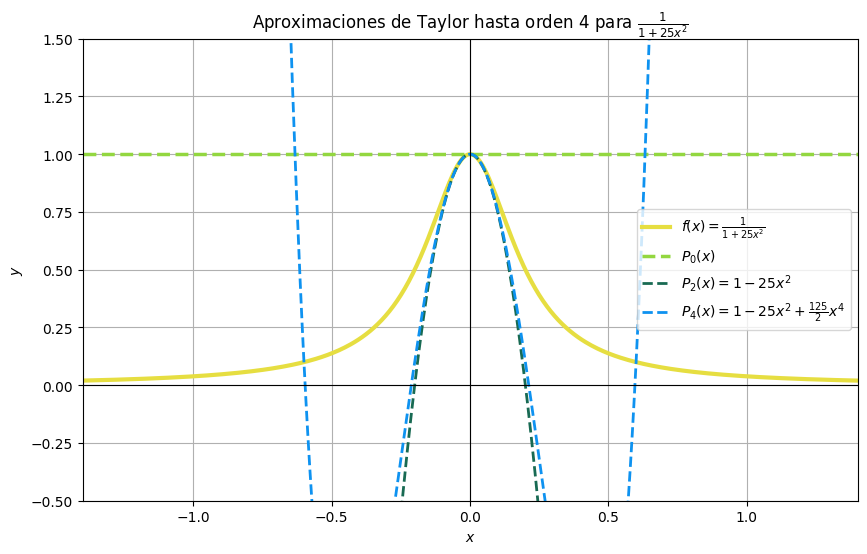

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-1.4, 1.4, 400)


foriginal = 1 / (1 + 25*(x**2))


P0 = np.ones_like(x)  
P2 = 1 - 25*(x**2)  
P4 = 1 - 25*(x**2) + (125/2)*(x**4)  

# Gráfica
plt.figure(figsize=(10, 6))

plt.plot(x, foriginal, label=r'$f(x)=\frac{1}{1 + 25x^2}$', color="#E6DE41", linewidth=3)
plt.plot(x, P0, '--', label=r'$P_0(x)$', color="#93D740", linewidth=2.5)
plt.plot(x, P2, '--', label=r'$P_2(x)=1 - 25x^2$', color="#186A53", linewidth=2)
plt.plot(x, P4, '--', label=r'$P_4(x)=1 - 25x^2 + \frac{125}{2}x^4$', color="#0E92F0", linewidth=2)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Aproximaciones de Taylor hasta orden 4 para $\frac{1}{1+25x^2}$')

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xlim(-1.4, 1.4)
plt.legend()

plt.show()


Polinomio de Lagrange

$\frac{1}{25x^2+1} $

$ (-0.4, 0.2), (-0.2, 0.5), (0, 1), (0.2, 0.5), (0.4, 0.2) $

Polinomio de Lagrange:
62.5*x**4 + 5.32907051820075e-15*x**3 - 15.0*x**2 + 1.0


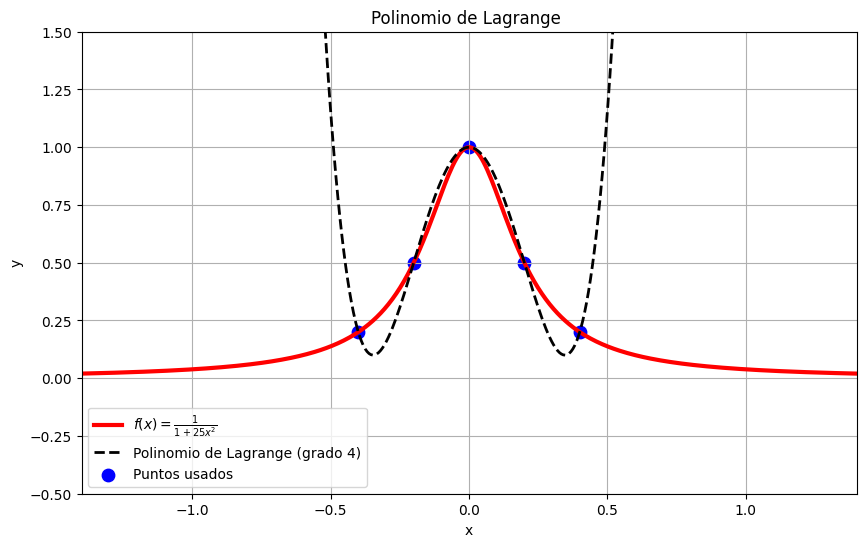

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(-1.4, 1.4, 400)


f_original = 1 / (1 + 25*X**2)


p_x = [-0.4, -0.2, 0, 0.2, 0.4]
p_y = [0.2, 0.5, 1, 0.5, 0.2]


x = sp.symbols('x')
#lagrange
def lagrange(px, py):
    n = len(px)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - px[j]) / (px[i] - px[j])
        P += py[i] * L
    return sp.simplify(P)


P = lagrange(p_x, p_y)


print("Polinomio de Lagrange:")
print(P)


fP = sp.lambdify(x, P, "numpy")

# Gráfica
plt.figure(figsize=(10,6))

plt.plot(X, f_original, 
         label=r'$f(x)=\frac{1}{1+25x^2}$', 
         color='red', linewidth=3)

plt.plot(X, fP(X), '--', 
         color='black', linewidth=2,
         label='Polinomio de Lagrange (grado 4)')

plt.scatter(p_x, p_y, s=80, color='blue', label='Puntos usados')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio de Lagrange ')
plt.grid(True)
plt.legend()

plt.xlim(-1.4, 1.4)
plt.ylim(-0.5, 1.5)

plt.show()


---

- 2. $ \arctan(x), x_0 = 1  $


Serie de Taylor 

Polinomio de 4 Orden: $ \frac{x^3}{12} - \frac{x^2}{2} + \frac{5x}{4} - \frac{5}{6} + \frac{\pi}{4}  $

In [13]:
import sympy as sp


x = sp.Symbol('x')


f = sp.atan(x)


derivs = [f.diff(x, k) for k in range(5)]


x0 = 1


valores_en_x0 = [expr.subs(x, x0) for expr in derivs]

# taylor
def taylor_serie(x0, grado):
    pol = 0
    for k in range(grado + 1):
        termino = valores_en_x0[k] * (x - x0)**k / sp.factorial(k)
        pol += termino
    return sp.simplify(pol)

# Hasta grado 4
max_orden = 4

for n in range(max_orden + 1):
    t = taylor_serie(x0, n)
    print(f"Grado {n}: {t}")


Grado 0: pi/4
Grado 1: x/2 - 1/2 + pi/4
Grado 2: -x**2/4 + x - 3/4 + pi/4
Grado 3: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Grado 4: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4


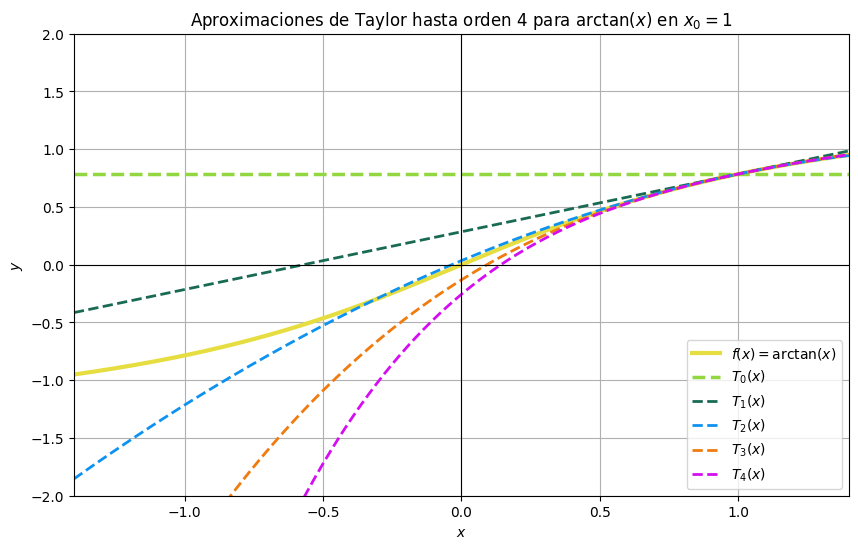

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math


x = np.linspace(-1.4, 1.4, 400)


foriginal = np.arctan(x)


x0 = 1

T0 = math.atan(1) + 0*(x-x0)
T1 = math.atan(1) + (1/2)*(x-x0)
T2 = math.atan(1) + (1/2)*(x-x0) - (1/4)*(x-x0)**2
T3 = math.atan(1) + (1/2)*(x-x0) - (1/4)*(x-x0)**2 + (1/6)*(x-x0)**3
T4 = math.atan(1) + (1/2)*(x-x0) - (1/4)*(x-x0)**2 + (1/6)*(x-x0)**3 - (1/8)*(x-x0)**4


plt.figure(figsize=(10, 6))

plt.plot(x, foriginal, label=r'$f(x)=\arctan(x)$', color="#E6DE41", linewidth=3)
plt.plot(x, T0, '--', label=r'$T_0(x)$', color="#93D740", linewidth=2.5)
plt.plot(x, T1, '--', label=r'$T_1(x)$', color="#186A53", linewidth=2)
plt.plot(x, T2, '--', label=r'$T_2(x)$', color="#0E92F0", linewidth=2)
plt.plot(x, T3, '--', label=r'$T_3(x)$', color="#F07B0E", linewidth=2)
plt.plot(x, T4, '--', label=r'$T_4(x)$', color="#D40EF0", linewidth=2)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Aproximaciones de Taylor hasta orden 4 para $\arctan(x)$ en $x_0=1$')

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.grid(True)
plt.ylim(-2, 2)
plt.xlim(-1.4, 1.4)
plt.legend()

plt.show()


Polinomio de Lagrange

$\arctan(x) $

$ (-1, -\frac{\pi}{4}), (-0.5, -0.463648), (0, 0), (0.5, 0.463648), (1, \frac{\pi}{4}) $

Polinomio de Lagrange:
x*(-1.11022302462516e-16*x**3 - 0.189197333333333*x**2 + 2.77555756156289e-17*x + 0.974595333333333)


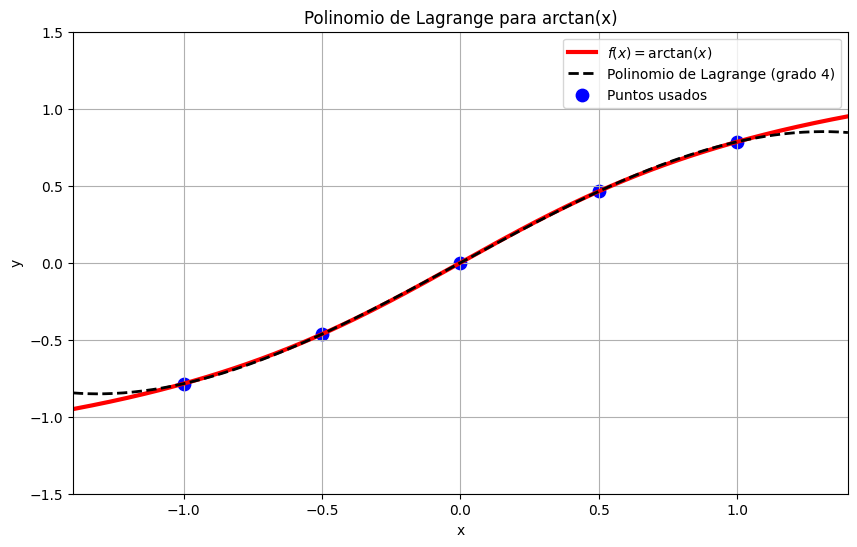

In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


X = np.linspace(-1.4, 1.4, 400)


f_original = np.arctan(X)


p_x = [-1, -0.5, 0, 0.5, 1]
p_y = [-0.785398, -0.463648, 0, 0.463648, 0.785398]


x = sp.symbols('x')

# Lagrange
def lagrange(px, py):
    n = len(px)
    P = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - px[j]) / (px[i] - px[j])
        P += py[i] * L
    return sp.simplify(P)

P = lagrange(p_x, p_y)


print("Polinomio de Lagrange:")
print(P)


fP = sp.lambdify(x, P, "numpy")

plt.figure(figsize=(10,6))

plt.plot(X, f_original, label=r'$f(x)=\arctan(x)$', 
         color='red', linewidth=3)

plt.plot(X, fP(X), '--', 
         color='black', linewidth=2,
         label='Polinomio de Lagrange (grado 4)')

plt.scatter(p_x, p_y, s=80, color='blue', label='Puntos usados')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio de Lagrange para arctan(x)')
plt.grid(True)
plt.legend()

plt.xlim(-1.4, 1.4)
plt.ylim(-1.5, 1.5)

plt.show()
